**FIT3183 Malicious AI & Dark Side Security**
# Week 5 Lab: Deepfakes I

This notebook explores what deepfakes are, what machine learning algorithms are used to create a deepfake animation and how they can be run.

## Deepfakes <a name="Deepfakes"></a> 
A deepfake, coming from the words *deep learning* and *fake*, is a synthetic media in which a person in an existing image or video is replaced with someone else's likeness. Deepfakes make use of powerful techniques from machine learning and artifical intellegence to manipulate and generate visual and audio content with a high potential to decieve. The underlying mechanism for deepfake creation is deep learning models such as autoencoders and generative adverisal networks (GAN). These models are used to to examine facial expressions and movements of a person and syntesixe facial images of another person making analogous expressions and movements. 

## Evolution of the Deepfakes <a name="Evolution-of-the-Deepfake"></a> 
In the late 90s and early 2000s face detection was a major area of research because of its possible implecations for military and security use. Almost twenty years later, this problem is basically solved and face detection technology is available freely as open-source libraries in most programming languages. Pythons most popular face detection library may be OpenCV or face-recognition. 

<img src="http://www.learnopencv.com/wp-content/uploads/2016/04/face-align-steps-768x341.jpg" height = 200>

In the first set of images the *face alignment* process is initialized. Left: Detected facial landmarks and convex hull. Middle: Delaunay triangulation of points on convex hull. Right: Face alignment by affine warping triangles.

<img src = 'https://learnopencv.com/wp-content/uploads/2016/04/seamless_cloning_parts.jpg' height = 200>

In the second set of images the face-swap process is continued. The dst image is image onto which we want to blend the source image (i.e. the image of Donald Trump ). The mask is calculated by filling the convex hull with white using fillConvexPoly and the center is the center of the bounding box that contains the mask.

Check out the recent Nvidia's Deep Fake of CEO Jensen Huang at GTC [(Behind the Scenes)](https://www.youtube.com/watch?v=f_V30ueEXE4)!

There are 4 task this week:

1. Task 1: **First Order Motion Model for Image Animation** 
- Demo for Animation and FaceSwap
2. Task 2: Part Swap Demo for **Motion Supervised co-part Segmentation**
3. (Optional) Advanced Task 3: **DeepFake Lite Training with DeepFaceLab**
4. (Optional) Advanced Task 4: **Motion Representations for Articulated Animation**

Some Deepfake Video Examples:
* [The Mona Lisa and Elon Musk](https://www.youtube.com/watch?v=GkOA0X-A58Q)
* [Kim Kardashian and Dr. K](https://www.youtube.com/watch?v=QmdbtEPlOVA)
* [Woman and Edward Snowden](https://www.youtube.com/watch?v=wSlC39NYenY)

Deepfakes are faked media that mimic another person's likeness. This process is achieved through something called "deep learning," hence the name deepfake.

*OpenSource:*

[DeepFaceLab](https://github.com/iperov/DeepFaceLab) - the leading software for creating deepfakes

Paper Reference: https://arxiv.org/abs/2005.05535

👉 *Copy this Colab notebook to your Drive*, read the instruction and fill the missing code.

👉 *Use GPU:* `Runtime > Change runtime type > GPU`.


<small>*Prepared by [Yin Yin Low](mailto:yin.low@monash.edu) (Lab Tutor) Aug 2022.*

## Introduction to Deepfake

## Creating a Deepfake <a name="Creating-a-Deepfake"></a> 
The deepfake creation process requires three steps: extraction, training and creation. This section will explain, at a top-level, what each of these stages mean and what they do in relation to the entire process. 

### Extraction <a name="Extraction"></a> 
Deepfakes leverage deep neural networks to transform faces and require large amounts of data (images) to make it all work smoothly and believable. The extraction process refers to the step of extracting all frames from video clips, identifying the faces and aligning them to optimze for perfomance. 

<img src="https://www.alanzucconi.com/wp-content/uploads/2018/03/deepfakes_04c.png" height=200>

The alignment is a critical step since the neural network that performs the faceswap requires all faces to have the same size (usualyl 256 x 256) and aligned features. Detecting and aligning faces is a problem that is considered mostly solved, and is done by most applications very efficiently (face detection).

### Training <a name="Training"></a> 
The training stage allows the neural network to convert a face into another. The training may take several hours or even days depending on the size of the training set and the device the model is trained on. Like training most other neural networks the training only needs to be completed once. Once the model is trained it would be able to convert a face from person A to person B.

<img src = 'https://www.alanzucconi.com/wp-content/uploads/2018/03/deepfakes_05d.png' >

This is the most technical step in the deepfake creation process and is explained in greater technical detail further into the paper.

### Creation <a name="Creation"></a> 
Once the model is trained, a deepfake may be created. Starting from a video, frames are extracted and all faces are aligned. Each frame is then converted using the trained neural network. The final step is to merge the converted face back to the original frame. 

<img src = 'https://www.alanzucconi.com/wp-content/uploads/2018/03/deepfakes_06d.png' >

The creation stage is the only one which does not make use of any machine learning algorithms. The process is to stich a face back onto an image is hard-coded and thus lacks the ability to detect mistakes.

<img src = 'https://www.alanzucconi.com/wp-content/uploads/2018/03/deepfakes_07e.png' >

Each frame is also processed independitly which means there is no temporal correlation. A temporal correlation function is a function that gives the statistical correlation between random variable, contingent on the temporal (time) distance between those variables. The lack of this correlation results in the final video having some flickering. This is the part of deepfakes which requires the most amount of research in. 

## Task 1 : First Order Model for Image Automation Demo

The problme thus far, when it came to building deepfakes, was the need for additional information. For example, if the movement of the head was to be mapped there was a need for specific subject facial landmarks and full-body mappings required subject pose-estimation.  In 2019 a research team from the University of Toronto introduced a paper called *First Order Model for Image Automation* at the NeuraIPS conference. This paper presented an impressive way to animate a source image given a driving video, without any additional information or annotation about the object to automate. This method outperfomed state of the art on all the benchmarks and works well on a variety of images. Apart from this, once the model was trained, it can be used for transfer learning and it can be applied to an arbitraty object of the same category. The source code for the project can be found on [Aliaksandr Siarohin Github Repo](https://aliaksandrsiarohin.github.io/first-order-model-website/)

This section explores the model the research team presented, explains how it works and clones it for use in this paper.

Image animation consists of generating a video sequence so that an object in a source image is animated according to the motion of a driving video.

<img src="https://miro.medium.com/max/1200/1*0LgOnnv9ySzYuCdM2lluMw.gif">

Bust of Nefertiti (Source) combined with the speech of Geoffrey Hinton (Source), parts of the model repository

Paper reference: [First Order Motion Model for Image Animation](https://papers.nips.cc/paper/8935-first-order-motion-model-for-image-animation)

## How does it work?

For training, the research team employ a large collection of video sequences containing objects of the same object category. Their model is trained to reconstruct the training videos by combining a single frame and a learned latent representation of the motion in the video. 

Observing frame pairs (source and driving), each extracted from the same video, it learns to encode motion as a combination of motion-specific keypoint displacements and local affine transformations. At test time they apply the model to pairs composed of the source image and of each frame of the driving video and perform image animation of the source object.

<img src="https://aliaksandrsiarohin.github.io/first-order-model-website/pipeline.png">

The framework is composed of two main modules: the motion estimation module and the image generation module. The purpose of the motion estimation module is to predict a dense motion field.

We assume there exists an abstract reference frame. And we independently estimate two transformations: from reference to source and from reference to driving. This choice allows us to independently process source and driving frames. This is desired since, at test time the model receives pairs of the source image and driving frames sampled from a different video, which can be very different visually.

We will go through three different use case:
1. **Animation**
<img src="https://aliaksandrsiarohin.github.io/first-order-model-website/fashion-teaser.gif">
2. **Face-Swap**
<img src="https://aliaksandrsiarohin.github.io/first-order-model-website/face-swap.gif">

In [ ]:
#@title Setup

%cd /content
!git clone --depth 1 https://github.com/eyaler/first-order-model
!wget --no-check-certificate -nc https://openavatarify.s3.amazonaws.com/weights/vox-adv-cpk.pth.tar
!wget --no-check-certificate -nc https://eyalgruss.com/fomm/vox-adv-cpk.pth.tar

!mkdir -p /root/.cache/torch/hub/checkpoints
%cd /root/.cache/torch/hub/checkpoints
!wget --no-check-certificate -nc https://eyalgruss.com/fomm/s3fd-619a316812.pth
!wget --no-check-certificate -nc https://eyalgruss.com/fomm/2DFAN4-11f355bf06.pth.tar
%cd /content

!pip install -U youtube-dl
!pip install -U imageio
!pip install -U imageio-ffmpeg
!pip install git+https://github.com/1adrianb/face-alignment@v1.0.1

/content
Cloning into 'first-order-model'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 54 (delta 7), reused 35 (delta 3), pack-reused 0
Unpacking objects: 100% (54/54), done.
--2021-08-23 02:17:54--  https://openavatarify.s3.amazonaws.com/weights/vox-adv-cpk.pth.tar
Resolving openavatarify.s3.amazonaws.com (openavatarify.s3.amazonaws.com)... 52.217.65.220
Connecting to openavatarify.s3.amazonaws.com (openavatarify.s3.amazonaws.com)|52.217.65.220|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 239313439 (228M) [application/x-tar]
Saving to: ‘vox-adv-cpk.pth.tar’

vox-adv-cpk.pth.tar 100%[===================>] 228.23M  47.4MB/s    in 5.3s    

2021-08-23 02:18:00 (43.1 MB/s) - ‘vox-adv-cpk.pth.tar’ saved [239313439/239313439]

File ‘vox-adv-cpk.pth.tar’ already there; not retrieving.

/root/.cache/torch/hub/checkpoints
--2021-08-23 02:18:00--  https://eyalgr

In [ ]:
#@title Get the Driver video and Avatar image from the web
#@markdown 1. You can change the URLs to your **own** stuff!
#@markdown 2. Alternatively, you can upload **local** files in the next cells

video_url = 'https://www.youtube.com/watch?v=OziXYniB5x4' #@param {type:"string"}
image_url = 'https://www.srugim.co.il/wp-content/uploads/2010/10/%D7%90%D7%97%D7%9E%D7%93-%D7%98%D7%99%D7%91%D7%99.jpg' #@param {type:"string"}

if video_url:
  !rm -f /content/video.mp4
  !youtube-dl -f 'bestvideo[ext=mp4][vcodec!*=av01][height<=360]+bestaudio[ext=m4a]/mp4[height<=360][vcodec!*=av01]/mp4[vcodec!*=av01]/mp4' '$video_url' --merge-output-format mp4 -o /content/video
  !mv /content/video.mp4 /content/video 

if image_url:
  !wget '$image_url' -O /content/image

[youtube] OziXYniB5x4: Downloading webpage
[youtube] OziXYniB5x4: Downloading MPD manifest
[download] Destination: /content/video.f134
[download] 100% of 209.83KiB in 00:00
[download] Destination: /content/video.f140
[download] 100% of 154.05KiB in 00:00
[ffmpeg] Merging formats into "/content/video.mp4"
Deleting original file /content/video.f134 (pass -k to keep)
Deleting original file /content/video.f140 (pass -k to keep)
--2021-08-23 02:24:40--  https://www.srugim.co.il/wp-content/uploads/2010/10/%D7%90%D7%97%D7%9E%D7%93-%D7%98%D7%99%D7%91%D7%99.jpg
Resolving www.srugim.co.il (www.srugim.co.il)... 104.22.18.104, 172.67.13.198, 104.22.19.104, ...
Connecting to www.srugim.co.il (www.srugim.co.il)|104.22.18.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘/content/image’

/content/image          [ <=>                ] 126.97K  --.-KB/s    in 0.03s   

2021-08-23 02:24:40 (4.00 MB/s) - ‘/content/image’ saved [130020]



In [ ]:
#@title Optionally upload local Driver video { run: "auto" }
manually_upload_video = False #@param {type:"boolean"}
if manually_upload_video:
  from google.colab import files
  import shutil

  %cd /content/sample_data
  try:
    uploaded = files.upload()
  except Exception as e:
    %cd /content
    raise e

  for fn in uploaded:
    shutil.move('/content/sample_data/'+fn, '/content/video')
    break
  %cd /content

In [ ]:
#@title Optionally upload local Avatar image { run: "auto" }
manually_upload_image = False #@param {type:"boolean"}
if manually_upload_image:
  from google.colab import files
  import shutil

  %cd /content/sample_data
  try:
    uploaded = files.upload()
  except Exception as e:
    %cd /content
    raise e

  for fn in uploaded:
    shutil.move('/content/sample_data/'+fn, '/content/image')
    break
  %cd /content

In [ ]:
#@title Optionally shorten Driver video
start_seconds = 0 #@param {type:"number"}
duration_seconds =  60#@param {type:"number"}
start_seconds = max(start_seconds,0)
duration_seconds = max(duration_seconds,0)

if duration_seconds:
  !mv /content/video /content/full_video
  !ffmpeg -ss $start_seconds -t $duration_seconds -i /content/full_video -f mp4 /content/video -y

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
#@title Prepare assets
#@markdown If you ran out of RAM this means that the video is too large. You can shorten it above.

center_video_to_head = True #@param {type:"boolean"}
crop_video_to_head = True #@param {type:"boolean"}
video_crop_expansion_factor = 2.5 #@param {type:"number"}
center_image_to_head = True #@param {type:"boolean"}
crop_image_to_head = False #@param {type:"boolean"}
image_crop_expansion_factor = 2.5 #@param {type:"number"}
video_crop_expansion_factor = max(video_crop_expansion_factor, 1)
image_crop_expansion_factor = max(image_crop_expansion_factor, 1)

import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML, clear_output
import warnings
warnings.filterwarnings("ignore")

import face_alignment
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=True,
                                      device='cuda')

def create_bounding_box(target_landmarks, expansion_factor=1):
    target_landmarks = np.array(target_landmarks)
    x_y_min = target_landmarks.reshape(-1, 68, 2).min(axis=1)
    x_y_max = target_landmarks.reshape(-1, 68, 2).max(axis=1)
    expansion_factor = (expansion_factor-1)/2
    bb_expansion_x = (x_y_max[:, 0] - x_y_min[:, 0]) * expansion_factor
    bb_expansion_y = (x_y_max[:, 1] - x_y_min[:, 1]) * expansion_factor
    x_y_min[:, 0] -= bb_expansion_x
    x_y_max[:, 0] += bb_expansion_x
    x_y_min[:, 1] -= bb_expansion_y
    x_y_max[:, 1] += bb_expansion_y
    return np.hstack((x_y_min, x_y_max-x_y_min))

def fix_dims(im):
    if im.ndim == 2:
        im = np.tile(im[..., None], [1, 1, 3])
    return im[...,:3]

def get_crop(im, center_face=True, crop_face=True, expansion_factor=1, landmarks=None):
    im = fix_dims(im)
    if (center_face or crop_face) and not landmarks:
        landmarks = fa.get_landmarks_from_image(im)
    if (center_face or crop_face) and landmarks:
        rects = create_bounding_box(landmarks, expansion_factor=expansion_factor)
        x0,y0,w,h = sorted(rects, key=lambda x: x[2]*x[3])[-1]
        if crop_face:
            s = max(h, w)
            x0 += (w-s)//2
            x1 = x0 + s
            y0 += (h-s)//2
            y1 = y0 + s
        else:
            img_h,img_w = im.shape[:2]
            img_s = min(img_h,img_w)
            x0 = min(max(0, x0+(w-img_s)//2), img_w-img_s)
            x1 = x0 + img_s
            y0 = min(max(0, y0+(h-img_s)//2), img_h-img_s)
            y1 = y0 + img_s            
    else:
        h,w = im.shape[:2]
        s = min(h,w)
        x0 = (w-s)//2
        x1 = x0 + s
        y0 = (h-s)//2
        y1 = y0 + s
    return int(x0),int(x1),int(y0),int(y1)

def pad_crop_resize(im, x0=None, x1=None, y0=None, y1=None, new_h=256, new_w=256):
    im = fix_dims(im)
    h,w = im.shape[:2]
    if x0 is None:
      x0 = 0
    if x1 is None:
      x1 = w
    if y0 is None:
      y0 = 0
    if y1 is None:
      y1 = h
    if x0<0 or x1>w or y0<0 or y1>h:
        im = np.pad(im, pad_width=[(max(-y0,0),max(y1-h,0)),(max(-x0,0),max(x1-w,0)),(0,0)], mode='edge')
    return resize(im[max(y0,0):y1-min(y0,0),max(x0,0):x1-min(x0,0)], (new_h, new_w))

source_image = imageio.imread('/content/image')
source_image = pad_crop_resize(source_image, *get_crop(source_image, center_face=center_image_to_head, crop_face=crop_image_to_head, expansion_factor=image_crop_expansion_factor))

with imageio.get_reader('/content/video', format='mp4') as reader:
  fps = reader.get_meta_data()['fps']

  driving_video = []
  landmarks = None
  try:
      for i,im in enumerate(reader):
          if not crop_video_to_head:
              break
          landmarks = fa.get_landmarks_from_image(im)
          if landmarks:
              break
      x0,x1,y0,y1 = get_crop(im, center_face=center_video_to_head, crop_face=crop_video_to_head, expansion_factor=video_crop_expansion_factor, landmarks=landmarks)
      reader.set_image_index(0)
      for im in reader:
          driving_video.append(pad_crop_resize(im,x0,x1,y0,y1))
  except RuntimeError:
      pass

def vid_display(source, driving, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(driving)):
        cols = [source]
        cols.append(driving[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani

clear_output()
if landmarks:
  print('first found head in frame %d'%i)
HTML(vid_display(source_image, driving_video).to_html5_video())

first found head in frame 0



best frame=153


(-0.5, 511.5, 255.5, -0.5)

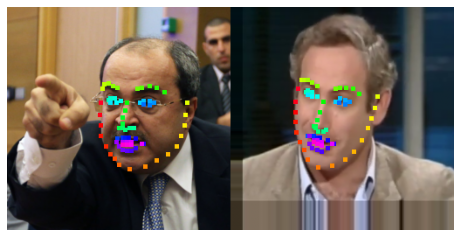

In [ ]:
#@title Find best alignment

%cd /content/first-order-model
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path='/content/first-order-model/config/vox-adv-256.yaml', 
                            checkpoint_path='/content/vox-adv-cpk.pth.tar')

from scipy.spatial import ConvexHull
def normalize_kp(kps):
    max_area = 0
    max_kp = None
    for kp in kps:
        kp = kp - kp.mean(axis=0, keepdims=True)
        area = ConvexHull(kp[:, :2]).volume
        area = np.sqrt(area)
        kp[:, :2] = kp[:, :2] / area
        if area>max_area:
          max_area = area
          max_kp = kp
    return max_kp

from tqdm import tqdm

kp_source = fa.get_landmarks_from_image(255 * source_image)
if kp_source:
  norm_kp_source = normalize_kp(kp_source)

norm  = float('inf')
best = 0
best_kp_driving = None
for i, image in tqdm(enumerate(driving_video)):
  kp_driving = fa.get_landmarks_from_image(255 * image)
  if kp_driving:
    norm_kp_driving = normalize_kp(kp_driving)
    if kp_source:
      new_norm = (np.abs(norm_kp_source - norm_kp_driving) ** 2).sum()
      if new_norm < norm:
        norm = new_norm
        best = i
        best_kp_driving = kp_driving
    else:
      best_kp_driving = kp_driving
      break

from logger import Visualizer
vis = Visualizer(kp_size=3, colormap='gist_rainbow')
source_with_kp = vis.draw_image_with_kp(source_image, kp_source[0]*2/np.array(source_image.shape[:2][::-1])[np.newaxis]-1) if kp_source else source_image
driving_with_kp = vis.draw_image_with_kp(driving_video[best], best_kp_driving[0]*2/np.array(driving_video[best].shape[:2][::-1])[np.newaxis]-1) if best_kp_driving else driving_video[best]

clear_output()
print('\nbest frame=%d'%best)
plt.figure(figsize=(8, 6))
plt.imshow(np.concatenate([source_with_kp, driving_with_kp], axis=1))
plt.axis('off')

In [ ]:
#@title Animate

exaggerate_factor = 5 #@param {type:"slider", min:0.1, max:5, step:0.1}
adapt_movement_scale = True #@param {type:"boolean"}
use_relative_movement = True #@param {type:"boolean"}
use_relative_jacobian = True #@param {type:"boolean"}

import torch
from skimage import img_as_ubyte

def full_normalize_kp(kp_source, kp_driving, kp_driving_initial, adapt_movement_scale=False,
                 use_relative_movement=False, use_relative_jacobian=False, exaggerate_factor=1):
    if adapt_movement_scale:
        source_area = ConvexHull(kp_source['value'][0].data.cpu().numpy()).volume
        driving_area = ConvexHull(kp_driving_initial['value'][0].data.cpu().numpy()).volume
        adapt_movement_scale = np.sqrt(source_area) / np.sqrt(driving_area)
    else:
        adapt_movement_scale = 1

    kp_new = {k: v for k, v in kp_driving.items()}

    if use_relative_movement:
        kp_value_diff = (kp_driving['value'] - kp_driving_initial['value'])
        kp_value_diff *= adapt_movement_scale * exaggerate_factor
        kp_new['value'] = kp_value_diff + kp_source['value']

        if use_relative_jacobian:
            jacobian_diff = torch.matmul(kp_driving['jacobian'], torch.inverse(kp_driving_initial['jacobian']))
            kp_new['jacobian'] = torch.matmul(jacobian_diff, kp_source['jacobian'])

    return kp_new

def make_animation(source_image, driving_video, generator, kp_detector, adapt_movement_scale=False,
                 use_relative_movement=False, use_relative_jacobian=False, cpu=False, exaggerate_factor=1):
    with torch.no_grad():
        predictions = []
        source = torch.tensor(source_image[np.newaxis].astype(np.float32)).permute(0, 3, 1, 2)
        if not cpu:
            source = source.cuda()
        driving = torch.tensor(np.array(driving_video)[np.newaxis].astype(np.float32)).permute(0, 4, 1, 2, 3)
        kp_source = kp_detector(source)
        kp_driving_initial = kp_detector(driving[:, :, 0])

        for frame_idx in tqdm(range(driving.shape[2])):
            driving_frame = driving[:, :, frame_idx]
            if not cpu:
                driving_frame = driving_frame.cuda()
            kp_driving = kp_detector(driving_frame)
            kp_norm = full_normalize_kp(kp_source=kp_source, kp_driving=kp_driving,
                                   kp_driving_initial=kp_driving_initial, adapt_movement_scale=adapt_movement_scale, use_relative_movement=use_relative_movement,
                                   use_relative_jacobian=use_relative_jacobian, exaggerate_factor=exaggerate_factor)
            out = generator(source, kp_source=kp_source, kp_driving=kp_norm)

            predictions.append(np.transpose(out['prediction'].data.cpu().numpy(), [0, 2, 3, 1])[0])
    return predictions

predictions_forward = make_animation(source_image, driving_video[best:], generator, kp_detector, adapt_movement_scale=adapt_movement_scale, use_relative_movement=use_relative_movement,
                                   use_relative_jacobian=use_relative_jacobian, exaggerate_factor=exaggerate_factor)
predictions_backward = make_animation(source_image, driving_video[:(best+1)][::-1], generator, kp_detector, adapt_movement_scale=adapt_movement_scale, use_relative_movement=use_relative_movement,
                                   use_relative_jacobian=use_relative_jacobian, exaggerate_factor=exaggerate_factor)

imageio.mimsave('/content/generated.mp4', [img_as_ubyte(frame) for frame in predictions_backward[::-1] + predictions_forward[1:]], fps=fps)
!ffmpeg -i /content/generated.mp4 -i /content/video -c:v libx264 -c:a aac -map 0:v -map 1:a? -pix_fmt yuv420p /content/final.mp4 -profile:v baseline -movflags +faststart -y
#video can be downloaded from /content/final.mp4

clear_output()
HTML(vid_display(source_image, driving_video, predictions_backward[::-1] + predictions_forward[1:]).to_html5_video())



In [ ]:
#@title Download
#@markdown 1. If it fails try running this cell again.
#@markdown 2. Alternatively, you can manually download "final.mp4" from the folder on the left (click "Refresh" if missing).

print() #see https://github.com/googlecolab/colabtools/issues/468
from google.colab import files
files.download('/content/final.mp4') #fails for Firefox private window

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Conclusion <a name="Conclusion"></a> 
It is becoming easier and easier to create quality deepfakes. Society should needs to understand of the possible dangerous this technology may be used for. Fake poltical speeches, fake advertisment endorsments and even create jokes to decieve between friends or family. By understanding its existence, people can be aware and pay more attention to discerning between real and fake.

Fake news is part of the fabric of today’s internet, now with Deepfakes easily assessable; this has brought disinformation to a whole new level. It has affected politics by spreading false information. It has led to people exploited by scammers who are using it to cheat money online. Deepfakes, as a form of disinformation, are dangerous. We need to educate people about technology, and people need to discern the truth rather than just believing what we see.

These deepfakes lack audio. With no volume or noise, maybe with subtitles these will be believed, but ultimately to create a true deepfake the voice needs to also be duped. This will be explored in following projects. A persons pitch, emotions and the way they sound must be copied and overlayed to enhance the realism of the deepfake 

In [ ]:
!rm -rf /content/first-order-model

## Task 2: Part Swap Demo for Motion Supervised co-part Segmentation

This notebook explore the code for the paper [Motion Supervised co-part Segmentation](http://arxiv.org/abs/2004.03234).

The paper explores self-supervised deep learning method for co-part segmentation. Differently from previous works, this paper approach develops the idea that motion information inferred from videos can be leveraged to discover meaningful object parts. Their method can also perform video editing (aka part-swaps).

### Example Segmentations
Unsupervised segmentations obtained with the method on VoxCeleb:

<img src="https://github.com/AliaksandrSiarohin/motion-cosegmentation/raw/master/sup-mat/vox-seg-0.gif">

### Example Part-Swaps
Part swapping for VoxCeleb dataset. Each triplet shows source image, target video (with swap mask in the corner) and result:

#### Hair Swap

<img src="https://github.com/AliaksandrSiarohin/motion-cosegmentation/raw/master/sup-mat/hair-line.gif">

#### Beard Swap

<img src="https://github.com/AliaksandrSiarohin/motion-cosegmentation/raw/master/sup-mat/beard-line.gif">

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/motion-cosegmentation motion-co-seg

In [ ]:
cd motion-co-seg/

Mount your Google drive folder on Colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Add shortcut of https://drive.google.com/open?id=1SsBifjoM_qO0iFzb8wLlsz_4qW2j8dZe to your google drive.

![Add to drive](https://raw.githubusercontent.com/wiki/YuvalNirkin/fsgan/media/add_to_drive.jpg)

### Load target video and source image

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/16.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/04.mp4')

#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

def display(source, target, generated=None):
    fig = plt.figure(figsize=(8 + 4 * (generated is not None), 6))

    ims = []
    for i in range(len(target)):
        cols = [source]
        cols.append(target[i])
        if generated is not None:
            cols.append(generated[i])
        im = plt.imshow(np.concatenate(cols, axis=1), animated=True)
        plt.axis('off')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=1000)
    plt.close()
    return ani
    

HTML(display(source_image, target_video).to_html5_video())

In [ ]:
from part_swap import load_checkpoints

reconstruction_module, segmentation_module = load_checkpoints(config='config/vox-256-sem-10segments.yaml', 
                                               checkpoint='/content/gdrive/My Drive/motion-supervised-co-segmentation/vox-10segments.pth.tar',
                                               blend_scale=1)

In [ ]:
import torch
import torch.nn.functional as F

import matplotlib.patches as mpatches

def visualize_segmentation(image, network, supervised=False, hard=True, colormap='gist_rainbow'):
    with torch.no_grad():
        inp = torch.tensor(image[np.newaxis].astype(np.float32)).permute(0, 3, 1, 2).cuda()
        if supervised:
            inp = F.interpolate(inp, size=(512, 512))
            inp = (inp - network.mean) / network.std
            mask = torch.softmax(network(inp)[0], dim=1)
            mask = F.interpolate(mask, size=image.shape[:2])
        else:
            mask = network(inp)['segmentation']
            mask = F.interpolate(mask, size=image.shape[:2], mode='bilinear')
    
    if hard:
        mask = (torch.max(mask, dim=1, keepdim=True)[0] == mask).float()
    
    colormap = plt.get_cmap(colormap)
    num_segments = mask.shape[1]
    mask = mask.squeeze(0).permute(1, 2, 0).cpu().numpy()
    color_mask = 0
    patches = []
    for i in range(num_segments):
        if i != 0:
            color = np.array(colormap((i - 1) / (num_segments - 1)))[:3]
        else:
            color = np.array((0, 0, 0))
        patches.append(mpatches.Patch(color=color, label=str(i)))
        color_mask += mask[..., i:(i+1)] * color.reshape(1, 1, 3)
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))

    ax[0].imshow(color_mask)
    ax[1].imshow(0.3 * image + 0.7 * color_mask)
    ax[1].legend(handles=patches)
    ax[0].axis('off')
    ax[1].axis('off')

visualize_segmentation(source_image, segmentation_module, hard=True)
plt.show()

### Identity Swapping

Identify index of the part that you want to swap. 
For example to make trump with red lips part 2 should be used

In [ ]:
from part_swap import make_video

## YOUR CODE STARTS HERE ##
# Identify index of the part you want to swap and make predictions videos of 
# making trump with red lips based on the chosen swap index, source image, target video, 
# segmentation module and reconstruction module (1 line)
# predictions = 

make_video(swap index=[], source_image = source image, target_video=target video,  segmentation_module =, reconstruction_module = )

# Display your prediction video after making trump with red lips with HTML() function
HTML(display(source_image, target_video, predictions).to_html5_video())

## YOUR CODE ENDS HERE ##

In [ ]:
# Saving result video
from skimage import img_as_ubyte
imageio.mimsave('../result.mp4', [img_as_ubyte(frame) for frame in predictions], fps=30)

### Changing Eye Color

In [ ]:
source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/26.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/11.mp4')
source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

## YOUR CODE STARTS HERE ##
# Make predictions videos of changing eye color based on the chosen swap index, soruce image, target video, segmentation module and
# reconstruction module (1 line)
# predictions =

predictions = make_video(swap_index=[], source_image=source_image , target_video=target_video, segmentation_module=segmentation_module, reconstruction_module=reconstruction_module)


# Display your prediction video after changing eye color with HTML() function
## YOUR CODE ENDS HERE ##

In [ ]:
del predictions
del source_image
del target_video
del reconstruction_module
del segmentation_module

### Examples with 5-segment model

In [ ]:
from part_swap import load_checkpoints

reconstruction_module, segmentation_module = load_checkpoints(config='config/vox-256-sem-5segments.yaml', 
                                               checkpoint='/content/gdrive/My Drive/motion-supervised-co-segmentation/vox-5segments.pth.tar',
                                               blend_scale=1)

In [ ]:
source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/27.png')
source_image = resize(source_image, (256, 256))[..., :3]
visualize_segmentation(source_image, segmentation_module, hard=True)
plt.show()

### Changing Hair

In [ ]:
from part_swap import make_video

source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/27.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/02.mp4')
source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

## YOUR CODE STARTS HERE ##
# Make predictions videos of changing hair based on the chosen swap index, soruce image, target video, segmentation module and
# reconstruction module (1 line)
# predictions =

# Display your prediction video after hair with HTML() function
## YOUR CODE ENDS HERE ##

### Source segmentation
It can be used if warped source region be outside the target mask.

In [ ]:
from part_swap import make_video

source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/27.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/04.mp4')
source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

predictions = make_video(swap_index=[3, 4,5], source_image = source_image, target_video = target_video, use_source_segmentation=True,
                             segmentation_module=segmentation_module, reconstruction_module=reconstruction_module)
HTML(display(source_image, target_video, predictions).to_html5_video())

### Adding Beard

In [ ]:
source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/23.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/07.mp4')
source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

## YOUR CODE STARTS HERE ##
# Make predictions videos of adding beard based on the chosen swap index, soruce image, target video, segmentation module and
# reconstruction module (1 line)
# predictions =

# Display your prediction video after adding beard with HTML() function
## YOUR CODE ENDS HERE ##

In [ ]:
del predictions
del source_image
del target_video
del reconstruction_module
del segmentation_module

### Reference: Supervised Part-Swaps
For the reference we provide a method for supervised part-swaps
Download model of @zllrunning for face parsing

In [ ]:
!git clone https://github.com/AliaksandrSiarohin/face-makeup.PyTorch face_parsing

In [ ]:
from part_swap import load_face_parser
face_parser = load_face_parser(cpu=False)

source_image = imageio.imread('/content/gdrive/My Drive/motion-supervised-co-segmentation/16.png')
target_video = imageio.mimread('/content/gdrive/My Drive/motion-supervised-co-segmentation/04.mp4') #trump video

#Resize image and video to 256x256

source_image = resize(source_image, (256, 256))[..., :3]
target_video = [resize(frame, (256, 256))[..., :3] for frame in target_video]

visualize_segmentation(source_image, face_parser, supervised=True, hard=True, colormap='tab20')
plt.show()

In [ ]:
from part_swap import load_checkpoints

reconstruction_module, segmentation_module = load_checkpoints(config='config/vox-256-sem-10segments.yaml', 
                                               checkpoint='/content/gdrive/My Drive/motion-supervised-co-segmentation/vox-first-order.pth.tar',
                                               blend_scale=0.125, first_order_motion_model=True)

Segmentation part initialized at random

In [ ]:
## YOUR CODE STARTS HERE ##
# Make predictions videos of segmentation part with the chosen swap index, soruce image, target video, segmentation module and
# reconstruction module (1 line)
# predictions = 

make_video (swap_index=[], source_image = source_image,
                         target_video = target_video, use_source_segmentation=True, segmentation_module=segmentation_module,
                         reconstruction_module=reconstruction_module, face_parser=face_parser)

# Display your prediction video with HTML() function
## YOUR CODE ENDS HERE ##